# Classification model- Medical Kit



### Evaluation Metrics in Classification

![Log loss](./images/logloss.png)
![Metrics Clasification](./images/Metrics-Class.png)
![Matrix of Confusition](./images/mofc.png)

1. Precision: Represents the proportion of true positives (TP) over the total of positive predictions (TP + FP). It is a measure of the model's accuracy in predicting positive samples.(Prediction Columns)

2. Recall: Represents the proportion of true positives (TP) over the total of actual positive samples (TP + FN). It is a measure of the model's ability to correctly identify positive samples. (Actual Rows)

3. F1-Score: It is a measure that combines both precision and recall into a single value. The F1-Score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

4. Accuracy: It measures the overall correctness of the model's predictions by comparing the number of correct predictions to the total number of predictions.

5. Support: Represents the number of real samples in each class. It provides information about class imbalance and the amount of data used to calculate the metrics.

6. Area Under the ROC Curve (AUC-ROC): It evaluates the model's ability to discriminate between positive and negative instances across various classification thresholds. The ROC curve plots the true positive rate against the false positive rate, and AUC-ROC represents the area under this curve. A higher AUC-ROC indicates better model performance



In [1]:
# Import libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import missingno as miss
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [175]:
#Replace the value of these missing values represented as ? with the NaN value
# Loading dataset
data = pd.read_csv('./bdb-ml-test/dataset/train.csv',dtype={'ID': str})  # Datos de Entrenamiento
datates = pd.read_csv('./bdb-ml-test/dataset/test.csv',dtype={'ID': str})  # datos a predecir(no conoce els istema)
data["ID"] = data["ID"].astype(pd.StringDtype())
datates["ID"] = datates["ID"].astype(pd.StringDtype())

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6736 non-null   string 
 1   Distributor  6736 non-null   int64  
 2   Product      6736 non-null   int64  
 3   Duration     6736 non-null   int64  
 4   Destination  6736 non-null   int64  
 5   Sales        6736 non-null   float64
 6   Commission   6736 non-null   float64
 7   Gender       2032 non-null   float64
 8   Age          6736 non-null   int64  
 9   Target       6736 non-null   int64  
dtypes: float64(3), int64(6), string(1)
memory usage: 526.4 KB


####  pygWalker libray
It is a library for python that it converted your data  in a interface visual
https://docs.kanaries.net/es/pygwalker/index
pip install pygWalker libray to visualize data

## Exploratory analysis to visualize missing data and outliers

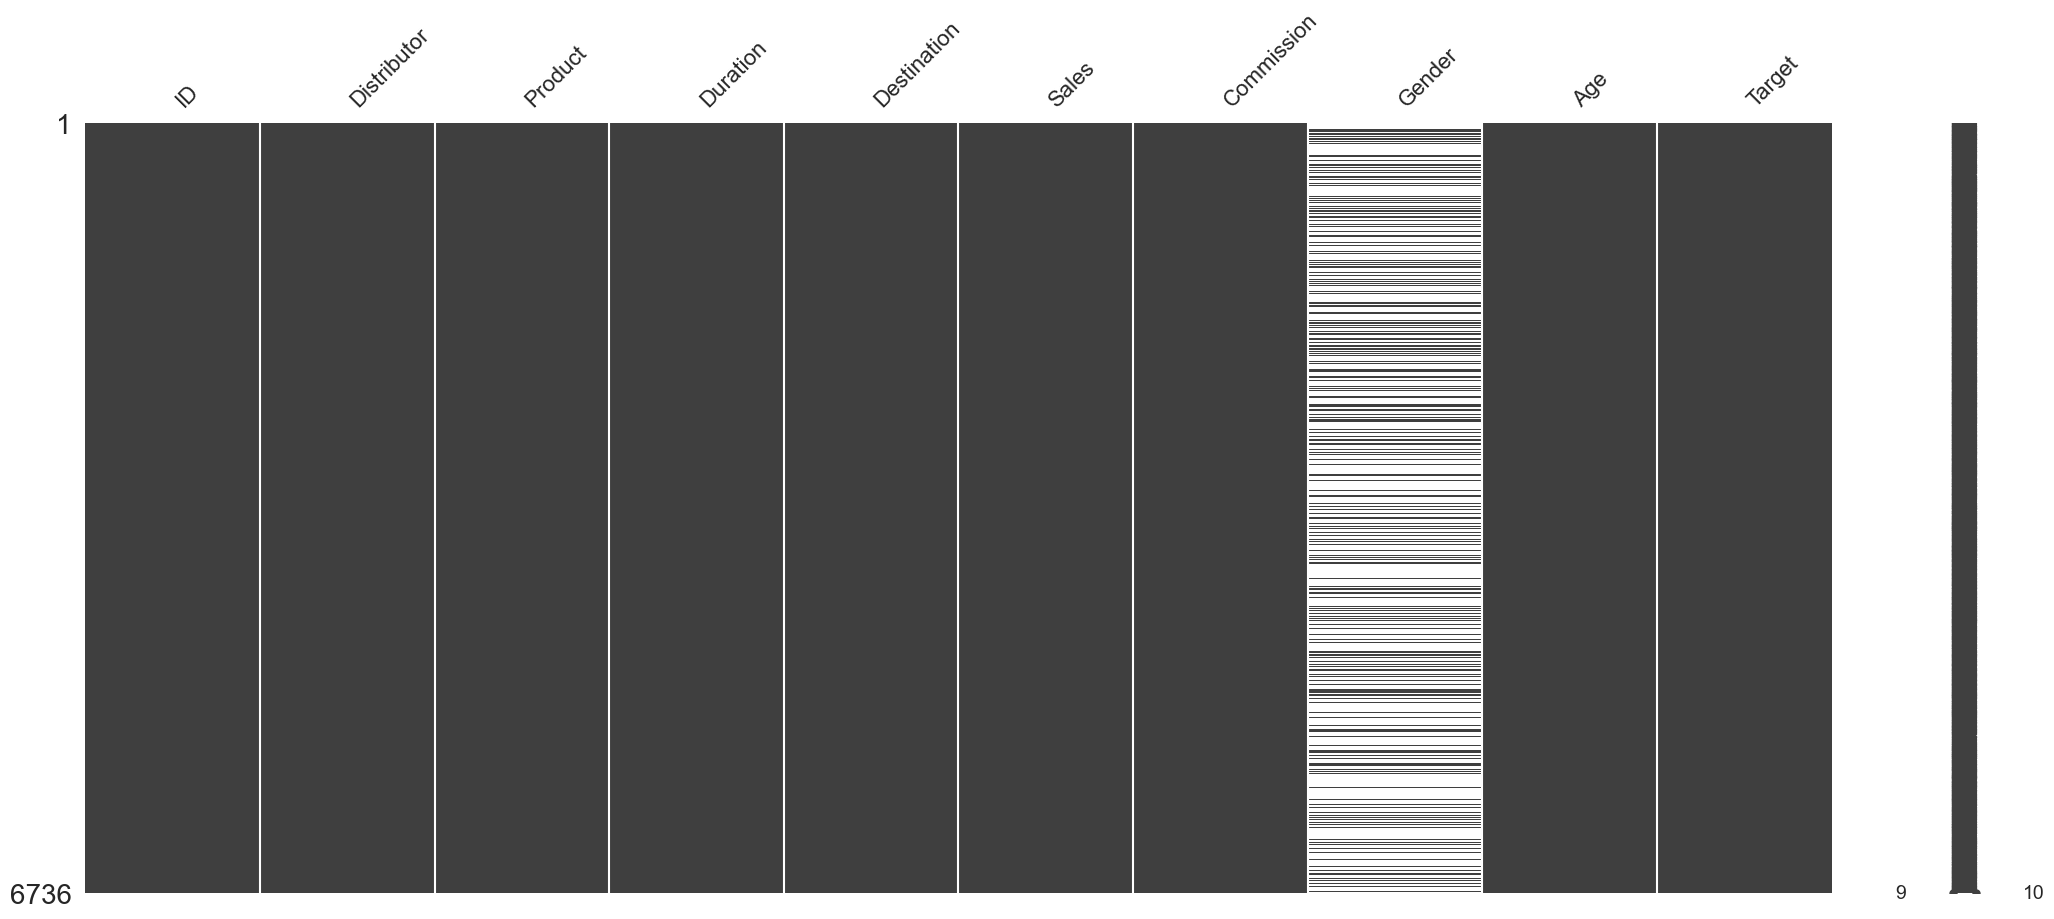

In [177]:
#Visualize missing data columns
miss.matrix(data);

<Axes: >

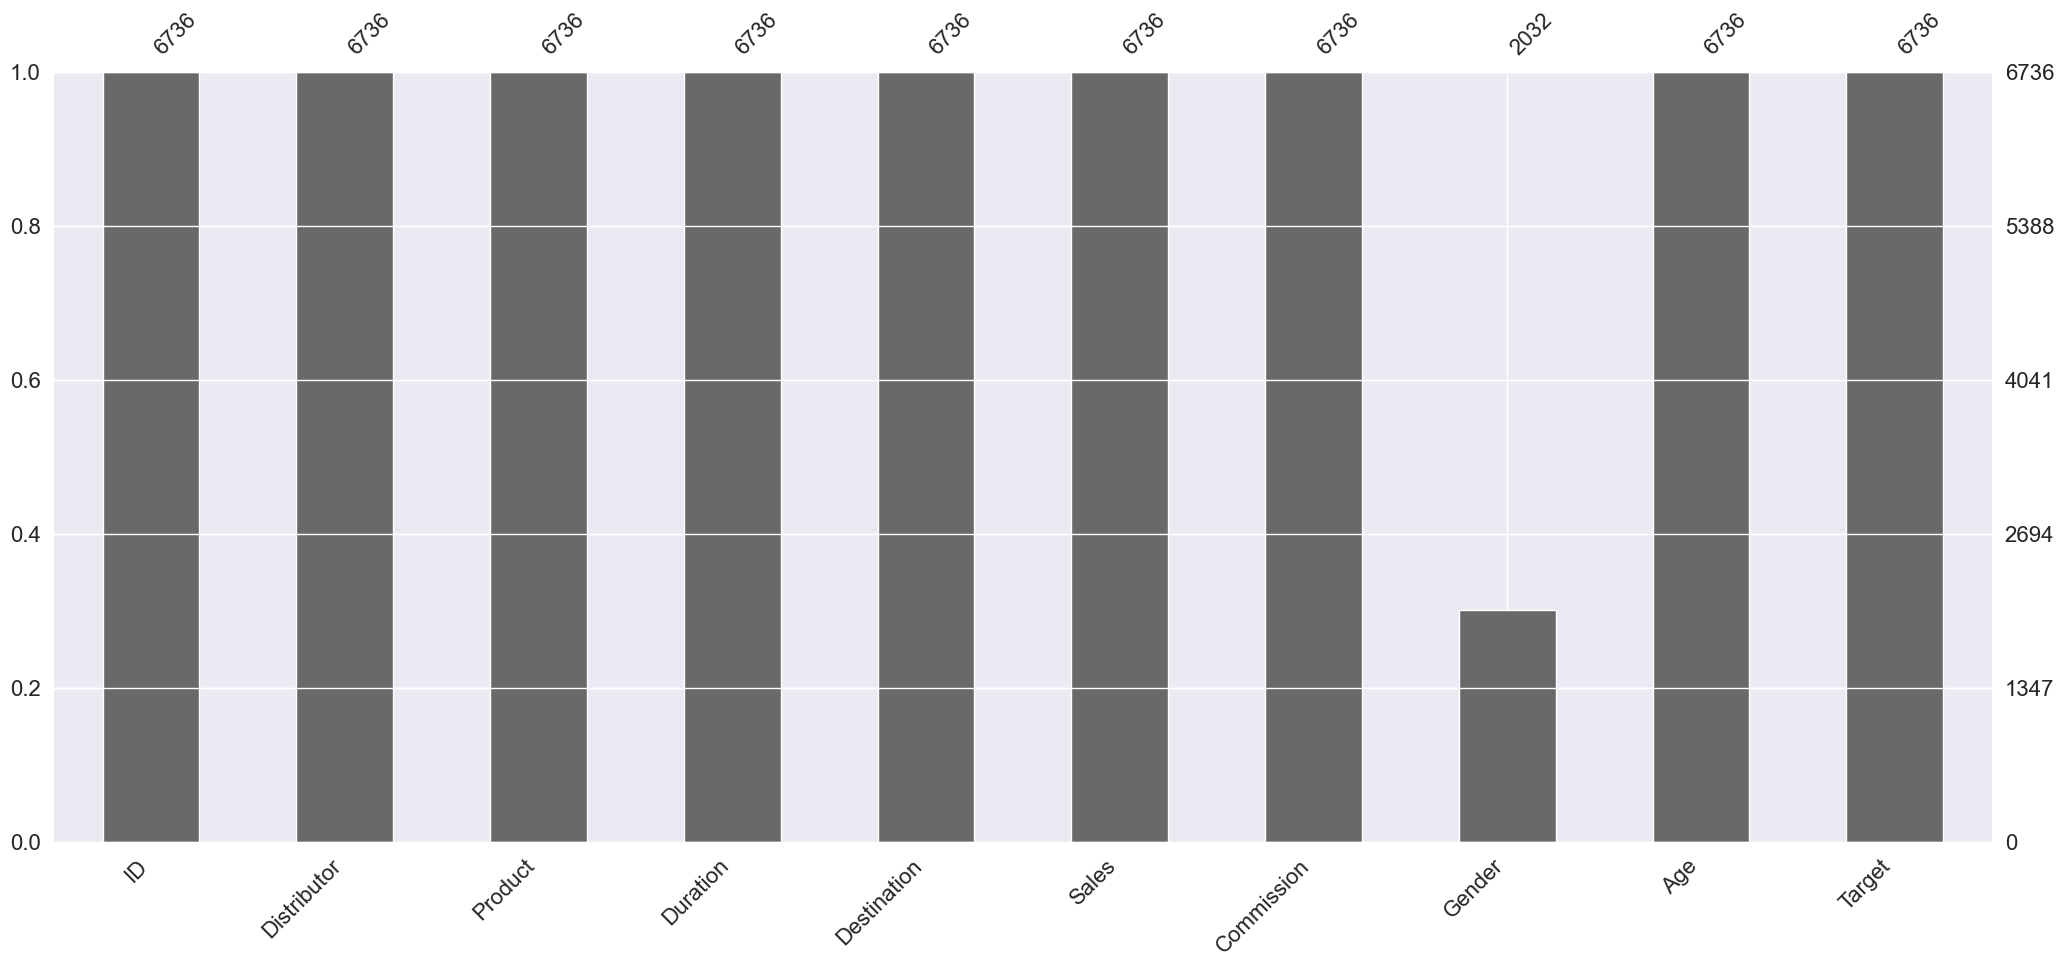

In [178]:
miss.bar(data)

### Data Preprocessing - Handling missing data
#### 1. Discard columns with too many missing values.

In [179]:
# Imputation of missing values with the media of each columns  
datafill=data.copy()
#method='ffill': Rellena los valores nulos hacia adelante (desde el primer valor no nulo posterior) dentro de cada grupo definido por una o más columnas.
datafill['Gender'].fillna(method='bfill', inplace=True)

<Axes: >

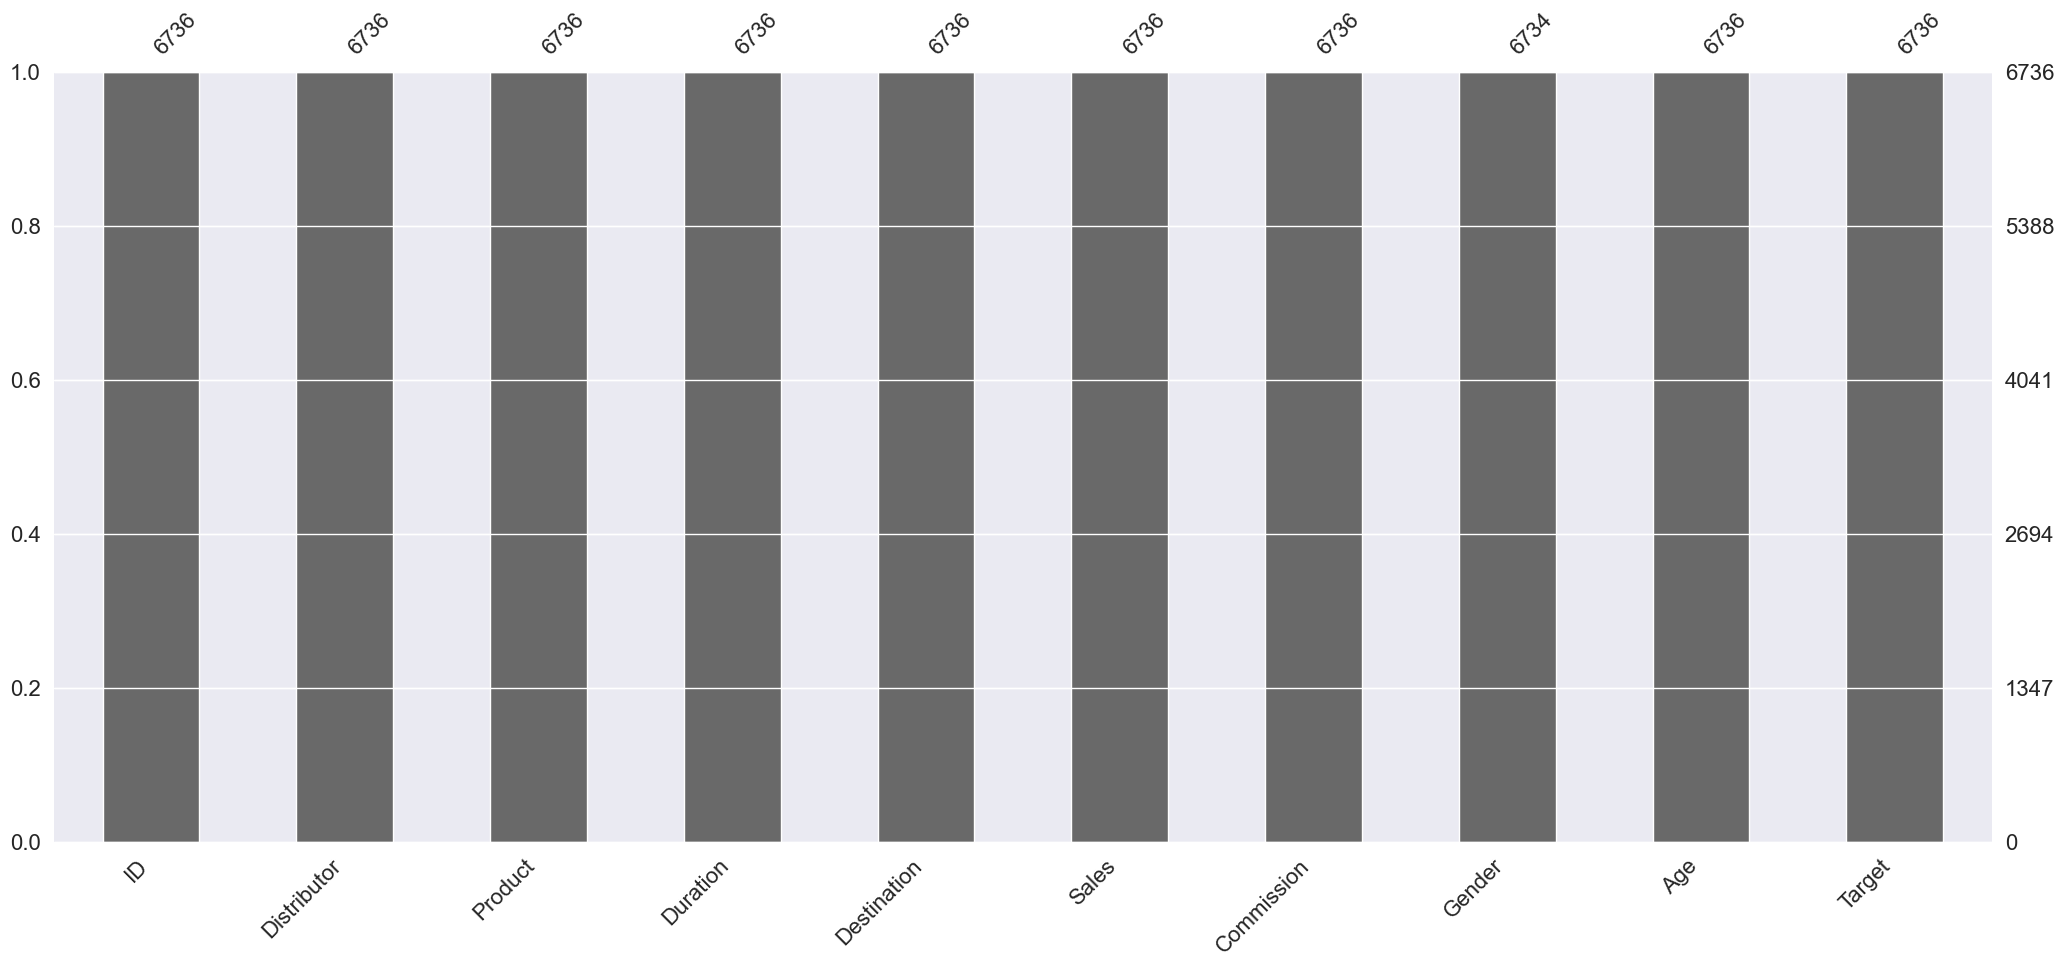

In [180]:
miss.bar(datafill)

##### Visualize data
https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/

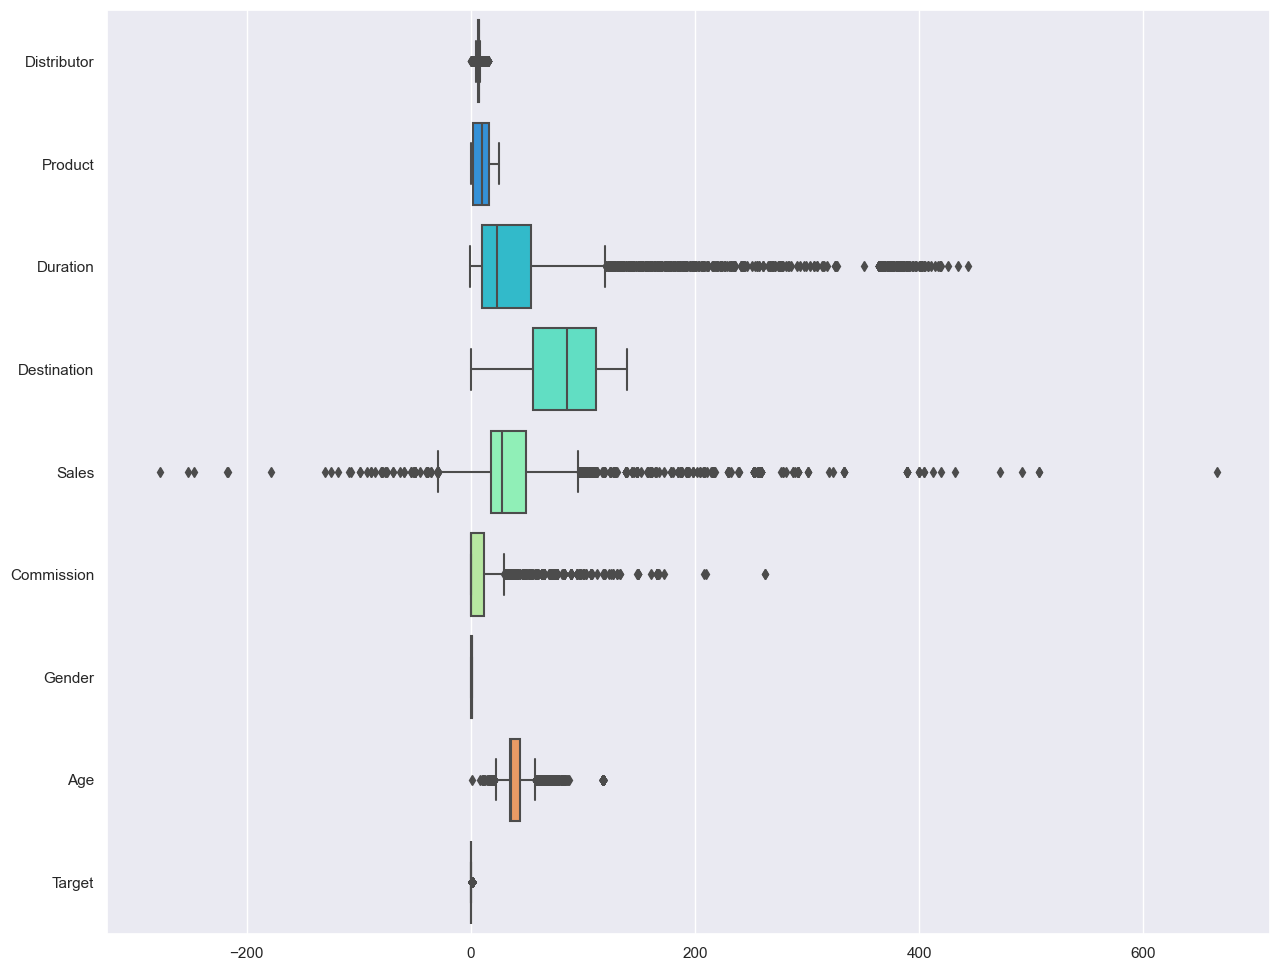

In [181]:
# boxplots (diagrama de caja) y violin plots are using to determine outliers
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(data=datafill,palette='rainbow',orient='h');

In [182]:
# Verificar que no haya valores faltantes
print(datafill.isnull().sum())

ID             0
Distributor    0
Product        0
Duration       0
Destination    0
Sales          0
Commission     0
Gender         2
Age            0
Target         0
dtype: int64


In [183]:
#Completar con la media
datafill['Gender'].fillna(datafill['Gender'].mean(), inplace=True)

In [184]:
# Verificar que no haya valores faltantes
print(datafill.isnull().sum())

ID             0
Distributor    0
Product        0
Duration       0
Destination    0
Sales          0
Commission     0
Gender         0
Age            0
Target         0
dtype: int64


#### 2. Distribucion  de variables Objetivo

In [185]:
distribucion_target = data['Target'].value_counts()
print(distribucion_target)


0    6420
1     316
Name: Target, dtype: int64


In [186]:
productos_distribuidores_conteo = data.groupby(['Target'])['Target'].value_counts()
print(productos_distribuidores_conteo.unstack())

Target       0      1
Target               
0       6420.0    NaN
1          NaN  316.0


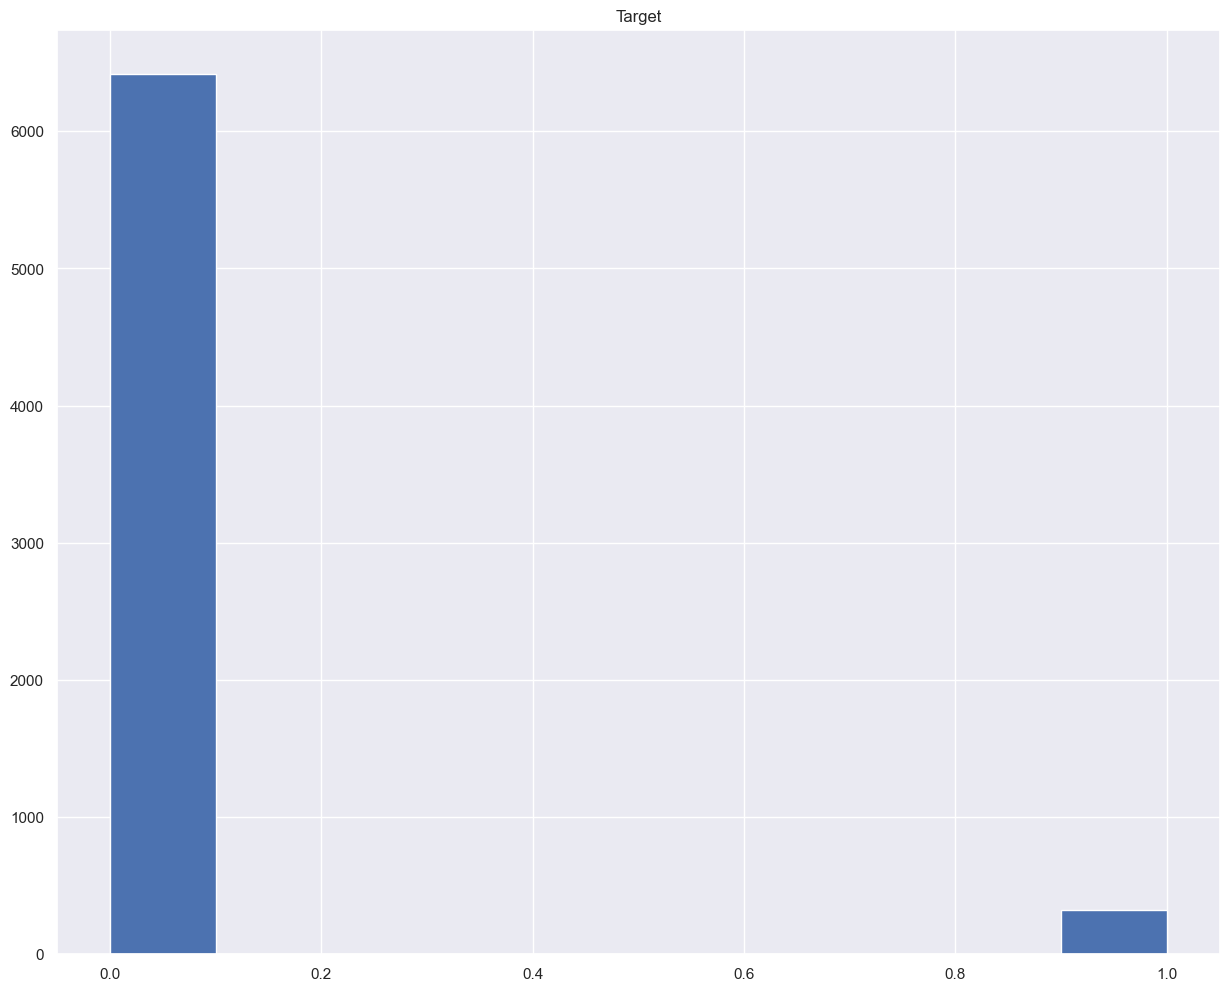

In [187]:
viz = data[['Target']]
viz.hist()
plt.show()

## Crete Base Model  
####  1. RandomForest

In [188]:
# Split the data into features (X) and labels (y)  
#X_train= datafill.drop('Target', axis=1)
X = datafill.drop(columns=['Target'], axis=1)
y=  datafill['Target']
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Guardar el ID por separado antes de eliminarlo de las características
#ID: Es un identificador único para cada registro en tu conjunto de datos. 
#No contiene información que pueda ser útil para predecir la variable objetivo (Target).
#Dejarla en el conjunto de características puede añadir ruido y afectar negativamente al modelo
#Por lo anterior de borra
train_ids = X_train['ID']
test_ids = X_test['ID']
# Eliminar la columna 'ID' de las características
X_train = X_train.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)

In [190]:
# Create the model Random Forest
model = RandomForestClassifier(n_estimators=50, random_state=42)
#rf_train_pred,rf_test_pred= buil_model(rf_model)

In [191]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [192]:
# Realizar predicciones
#Set training
y_pred_training = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Evaluar el modelo
#Calculate accuracy in train data
print("Training Data")
accuracytra = accuracy_score(y_train, y_pred_training)
reporttra = classification_report(y_train, y_pred_training)
matrixtra = confusion_matrix(y_train, y_pred_training)
print(f"Precisión: {accuracytra}")
print("Reporte de clasificación:")
print(reporttra)
print("Matriz de confusión:")
print(matrixtra)
print("  ")
 # Calculate accuracy in test data
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
print("Test Data")
print(f"Precisión: {accuracy}")
print("Reporte de clasificación:")
print(report)
print("Matriz de confusión:")
print(matrix)

Training Data
Precisión: 0.9988864142538976
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      0.98      0.99       245

    accuracy                           1.00      5388
   macro avg       1.00      0.99      0.99      5388
weighted avg       1.00      1.00      1.00      5388

Matriz de confusión:
[[5143    0]
 [   6  239]]
  
Test Data
Precisión: 0.9480712166172107
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1277
           1       0.56      0.07      0.12        71

    accuracy                           0.95      1348
   macro avg       0.75      0.53      0.55      1348
weighted avg       0.93      0.95      0.93      1348

Matriz de confusión:
[[1273    4]
 [  66    5]]


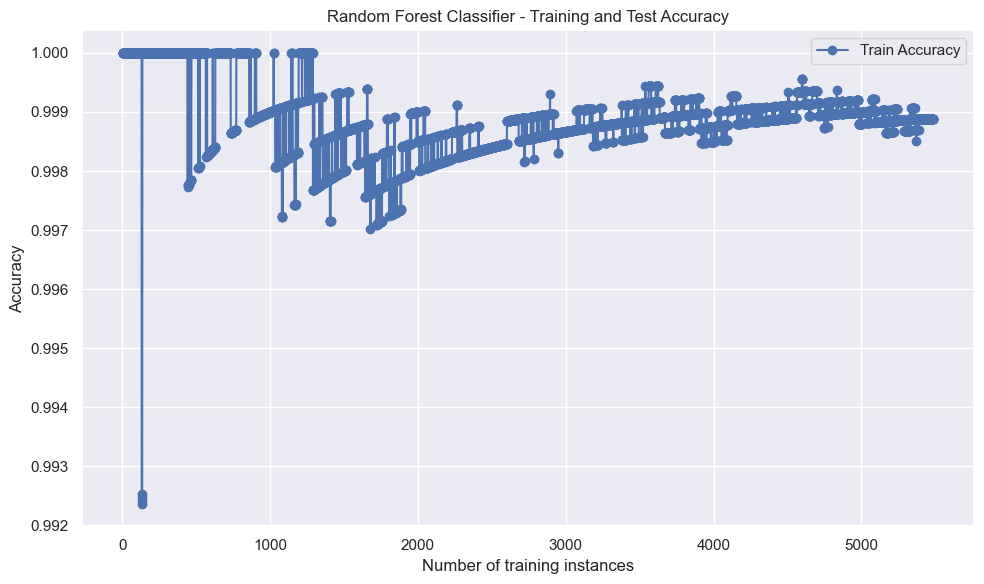

In [194]:
# Listas para almacenar la precisión durante el entrenamiento y la evaluación
import numpy as np
train_accuracy = []
test_accuracy = []

# Entrenamiento del modelo
for i in range(1, len(X_train) + 100):
    model.fit(X_train[:i], y_train[:i])
    y_train_pred = model.predict(X_train[:i])
    train_accuracy.append(accuracy_score(y_train[:i], y_train_pred))
    
    y_test_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Graficar la precisión durante el entrenamiento y la evaluación
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', marker='o')
#plt.plot(np.arange(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy', marker='o')
plt.title('Random Forest Classifier - Training and Test Accuracy')
plt.xlabel('Number of training instances')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Preprocesar los nuevos datos**

Archivo text.cvs

In [87]:
# Preprocesar los nuevos datos
datates['Gender'].fillna(method='bfill', inplace=True)
datates['Gender'].fillna(datates['Gender'].mean(), inplace=True)

In [88]:
# Realizar predicciones nuevo casos sin etiqueta
new_ids = datates['ID']
new_X = datates.drop(['ID'], axis=1)

In [89]:
print(new_X.isnull().sum())

Distributor    0
Product        0
Duration       0
Destination    0
Sales          0
Commission     0
Gender         0
Age            0
dtype: int64


In [92]:
# Realizar las predicciones para los nuevos datos
y_predNew = model.predict(new_X)

In [93]:
# Asociar las predicciones con los IDs
results = pd.DataFrame({'ID': new_ids, 'Predicted_Target': y_predNew})
# Mostrar los resultados
print("\nResultados de las nuevas predicciones:")
print(results)



Resultados de las nuevas predicciones:
                            ID  Predicted_Target
0     fffe31003600330038003500                 0
1     fffe33003600300031003400                 0
2             fffe320033003300                 0
3             fffe390039003800                 0
4         fffe3500350031003000                 0
...                        ...               ...
2159      fffe3800350033003300                 0
2160  fffe34003700330030003900                 0
2161  fffe32003000330035003500                 0
2162      fffe3100370032003100                 0
2163      fffe3800340030003400                 0

[2164 rows x 2 columns]


In [94]:
# Escribir el DataFrame a un archivo CSV
results.to_csv("./bdb-ml-test/dataset/prediction.csv", index=False)

En un modelo de clasificación con Random Forest, es necesario codificar las variables categóricas antes de entrenar el modelo. Puedes utilizar técnicas como la codificación One-Hot o la codificación ordinal para convertir las categorías en representaciones numéricas.

In [ ]:
#codificar y decodificar variables categoricas
#encoding variables categorical
from sklearn import preprocessing
# Nuevos datos de ejemplo
new_data = {
    'ID': ['fffe31003000300034003000'],
    'Distributor': [8],
    'Product': [25],
    'Duration': [24],
    'Destination': [55],
    'Sales': [62.0],
    'Commission': [24.8],
    'Gender': ['Male'],
    'Age': [35]
}

new_df = pd.DataFrame(new_data)

# Aplicar el mismo preprocesamiento
new_df['ID'] = label_encoder_id.transform(new_df['ID'])
new_df['Gender'] = label_encoder_gender.transform(new_df['Gender'])

# Extraer características
X_new = new_df

# Hacer predicciones
y_pred_new = model.predict(X_new)

# Crear DataFrame con los resultados
results = pd.DataFrame({'ID': new_df['ID'], 'Predicted_Target': y_pred_new})

# Invertir la transformación de ID para obtener los valores originales
results['ID'] = label_encoder_id.inverse_transform(results['ID'])

print(results)

In [161]:
#cargar datos
import pandas as pd

# Datos de ejemplo
data = {
    'ID': ['fffe3800370038003900', 'fffe34003200370037003500', 'fffe32003100320030003200'],
    'Distributor': [7, 7, 7],
    'Product': [1, 1, 10],
    'Duration': [22, 26, 15],
    'Destination': [122, 52, 83],
    'Sales': [31.0, 22.0, 63.0],
    'Commission': [0.0, 0.0, 0.0],
    'Gender': ['Male', 'Female', 'Female'],
    'Age': [20, 36, 34],
    'Target': [0, 0, 0]
}

df = pd.DataFrame(data)

# Ver los datos
print(df)
#Convertir las columnas categóricas a numéricas
from sklearn.preprocessing import LabelEncoder

# Crear una copia de los datos para no modificar el DataFrame original
df_model = df.copy()

# Convertir la columna 'ID' y 'Gender' a valores numéricos
label_encoder_id = LabelEncoder()
df_model['ID'] = label_encoder_id.fit_transform(df_model['ID'])

label_encoder_gender = LabelEncoder()
df_model['Gender'] = label_encoder_gender.fit_transform(df_model['Gender'])

# Variable objetivo
y = df_model['Target']

# Características (incluyendo 'ID')
X = df_model.drop(['Target'], axis=1)

print(X)

                         ID  Distributor  Product  Duration  Destination  \
0      fffe3800370038003900            7        1        22          122   
1  fffe34003200370037003500            7        1        26           52   
2  fffe32003100320030003200            7       10        15           83   

   Sales  Commission  Gender  Age  Target  
0   31.0         0.0    Male   20       0  
1   22.0         0.0  Female   36       0  
2   63.0         0.0  Female   34       0  
   ID  Distributor  Product  Duration  Destination  Sales  Commission  Gender  \
0   2            7        1        22          122   31.0         0.0       1   
1   1            7        1        26           52   22.0         0.0       0   
2   0            7       10        15           83   63.0         0.0       0   

   Age  
0   20  
1   36  
2   34  


In [162]:
#Entrenar el modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión: {accuracy}")
print("Reporte de clasificación:")
print(report)


Precisión: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [168]:
#predecir nuevos valores
# Nuevos datos de ejemplo
from sklearn.preprocessing import LabelEncoder
new_data = {
    'ID': ['fffe31003000300034003000'],
    'Distributor': [8],
    'Product': [25],
    'Duration': [24],
    'Destination': [55],
    'Sales': [62.0],
    'Commission': [24.8],
    'Gender': ['Male'],
    'Age': [35]
}

new_df = pd.DataFrame(new_data)
label_encoder_id = LabelEncoder()

# Aplicar el mismo preprocesamiento
new_df['ID'] = label_encoder_id.fit_transform(new_df['ID'])
new_df['Gender'] = label_encoder_gender.fit_transform(new_df['Gender'])
# Extraer características
X_new = new_df

# Hacer predicciones
y_pred_new = model.predict(X_new)

# Crear DataFrame con los resultados
results = pd.DataFrame({'ID': new_df['ID'], 'Predicted_Target': y_pred_new})

# Invertir la transformación de ID para obtener los valores originales
results['ID'] = label_encoder_id.inverse_transform(results['ID'])

print(results)


                         ID  Predicted_Target
0  fffe31003000300034003000                 0
